In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import itertools
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from scipy.spatial import distance
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.neighbors import DistanceMetric
from haversine import haversine
plt.rc('font',family = 'Malgun Gothic')
plt.rc('axes',unicode_minus = False)

In [5]:
tmap_dir = os.getcwd() + "\\tmap\\"
tmap = pd.DataFrame()
for f in os.listdir(tmap_dir) :
    tmap = pd.concat([tmap,pd.read_csv(tmap_dir + f)],axis = 0,ignore_index=True)

In [6]:
tmap =tmap.rename(columns={"지역(시도)" : "시도","지역(시군구)" : "시군구"})
jeonju_list = ['전주시 덕진구', '전주시 완산구']
tmap_jj = tmap.query('시군구 in @jeonju_list')
tmap_jj = tmap_jj.sort_values(by='일자').reset_index(drop = True)
search_list = ['여행/레저', '쇼핑','생활편의']
tmap_df = tmap_jj.query('검색지유형1 in @search_list')

In [7]:
tmap_dir = os.getcwd() + "\\tmap19\\"
tmap = pd.DataFrame()
for f in os.listdir(tmap_dir) :
    tmap = pd.concat([tmap,pd.read_csv(tmap_dir + f)],axis = 0,ignore_index=True)

In [8]:
tmap =tmap.rename(columns={"지역(시도)" : "시도","지역(시군구)" : "시군구"})
jeonju_list = ['전주시 덕진구', '전주시 완산구']
tmap_jj = tmap.query('시군구 in @jeonju_list')
tmap_jj = tmap_jj.sort_values(by='일자').reset_index(drop = True)

In [9]:
search_list = ['여행/레저', '쇼핑','생활편의']
tmap_jj = tmap_jj.query('검색지유형1 in @search_list')

In [11]:
tmap_tot = pd.concat([tmap_jj,tmap_df]).reset_index(drop = True)

In [13]:
search_df = pd.read_csv("tmapdong.csv")

In [14]:
tmap_tot = pd.merge(tmap_tot,search_df,on='검색지명',how = 'left')

In [15]:
tmap_tot['년도'] = pd.to_datetime(tmap_tot['일자'],format = '%Y%m%d').dt.year

In [16]:
tour_df = pd.pivot_table(index='행정동',columns='년도',values='시도',aggfunc='count',data = tmap_tot).fillna(0)

In [17]:
tour_df.columns = [str(i) + "년도_검색량" for i in tour_df.columns]
tour_df.head()

,2019년도_검색량,2020년도_검색량
행정동,,
금암1동,260.0,27.0
금암2동,212.0,88.0
노송동,415.0,248.0
덕진동,1320.0,708.0
동서학동,145.0,75.0


In [2]:
jeonju_df = pd.read_csv('전주.csv')

In [ ]:
jeonju_df = pd.merge(jeonju_df,tour_df,on='행정동',how='left').fillna(0).set_index("행정동")

In [26]:
jeonju_df.iloc[:,-2:] = jeonju_df.iloc[:,-2:].astype('int64')

In [30]:
tmap['검색지유형1'].unique()

array(['교통편의', '쇼핑', '여행/레저', '생활편의', '그룹핑부속', '공공편의', '건물/시설', '기업/단체',
       '의료편의', '금융편의', 'AOI', '엔트랙'], dtype=object)

In [32]:
jeonju_df.to_csv("전주최종.csv")

In [4]:
final_df= pd.read_csv('통합데이터-final.csv',encoding = 'cp949')

In [ ]:
final_df =  pd.merge(jj_df[['2020년도_검색량']].reset_index(),final_df,on='행정동').iloc[:,:-1].set_index("행정동")

In [7]:
final_df =  final_df.set_index("행정동")

In [8]:
final_df.rename(columns = {"박미전수" : "문화시설수"},inplace = True)

In [9]:
final_df['문화시설수'] = final_df['공연장수'] + final_df['문화시설수']

In [10]:
del final_df['공연장수']

In [11]:
final_df['숙박수'] = final_df['민박숙박업소수'] + final_df['호텔수'] + final_df['펜션수']

In [12]:
finals = final_df.drop(['민박숙박업소수','호텔수','펜션수'],axis = 1)

In [13]:
finals['스토어수'] = finals['슈퍼마트수'] + finals['편의점수']
finals.drop(['슈퍼마트수','편의점수'],axis = 1,inplace = True)

In [14]:
finals['교통'] = finals['버스정류장수'] + finals['주차장수']

In [15]:
finals.drop(['버스정류장수','주차장수'],axis = 1,inplace = True)

In [16]:
scaler = StandardScaler()

In [17]:
scaler_df = pd.DataFrame(scaler.fit_transform(finals),index=finals.index,columns=finals.columns)

In [18]:
scaler_df.columns

Index(['전주역거리', '전주한옥마을거리', '고속버스터미널거리', '검색량', '가로수길수', '전통시장수', '지역특화거리점포수',
       '점포수', '향토문화유적', '식당수', '카페수', '문화시설수', 'cls', '숙박수', '스토어수', '교통'],
      dtype='object')

In [19]:
scaler_df.columns

Index(['전주역거리', '전주한옥마을거리', '고속버스터미널거리', '검색량', '가로수길수', '전통시장수', '지역특화거리점포수',
       '점포수', '향토문화유적', '식당수', '카페수', '문화시설수', 'cls', '숙박수', '스토어수', '교통'],
      dtype='object')

In [20]:
scaler_df2 = scaler_df[['전주역거리', '전주한옥마을거리', '고속버스터미널거리', '검색량', '식당수', '카페수', '문화시설수', '숙박수', '스토어수', '교통']]

In [21]:
from sklearn.cluster import KMeans

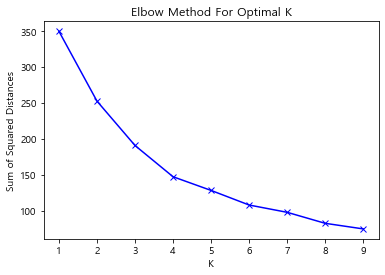

In [395]:
sum_of_squared_distances = []
k = range(1,10)
for i in k :
    km = KMeans(n_clusters=i)
    km = km.fit(scaler_df2)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(k,sum_of_squared_distances,'bx-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances')
plt.title("Elbow Method For Optimal K")
plt.show()

In [24]:
from sklearn_extra.cluster import KMedoids

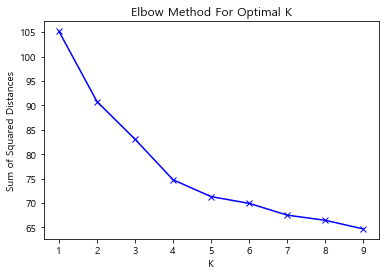

In [25]:
sum_of_squared_distances = []
k = range(1,10)
for i in k :
    km = KMedoids(n_clusters=i)
    km = km.fit(scaler_df2)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(k,sum_of_squared_distances,'bx-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances')
plt.title("Elbow Method For Optimal K")
plt.show()

In [26]:
sum_of_squared_distances

[105.18131728427969,
 90.78641145843935,
 83.07615759856719,
 74.76578444456607,
 71.31177045145846,
 69.93791479051438,
 67.52507411274355,
 66.46609855621749,
 64.70172763128507]

In [397]:
    km = KMedoids(n_clusters=4)
    km = km.fit(scaler_df2)

In [398]:
scaler_df2['kmedoids'] = km.labels_

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [399]:
km = KMeans(n_clusters=4)
scaler_df2['kmeans'] = km.fit(scaler_df2.iloc[:,:-1]).labels_

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [400]:
for i in range(scaler_df2['kmedoids'].nunique()) :
    print("Cluster {}의 행정동 : {}\n".format(i,scaler_df2.loc[scaler_df2['kmedoids']== i].index.tolist()))

Cluster 0의 행정동 : ['동서학동', '삼천1동', '서서학동', '완산동', '중화산1동', '팔복동', '평화1동', '효자1동', '효자2동', '효자3동']

Cluster 1의 행정동 : ['금암1동', '금암2동', '노송동', '우아1동', '우아2동', '인후1동', '인후2동', '인후3동', '중화산2동', '진북동', '호성동']

Cluster 2의 행정동 : ['덕진동', '서신동', '송천1동', '중앙동', '풍남동', '효자4동', '효자5동']

Cluster 3의 행정동 : ['삼천2동', '삼천3동', '송천2동', '여의동', '조촌동', '평화2동', '혁신동']



<Figure size 432x288 with 0 Axes>

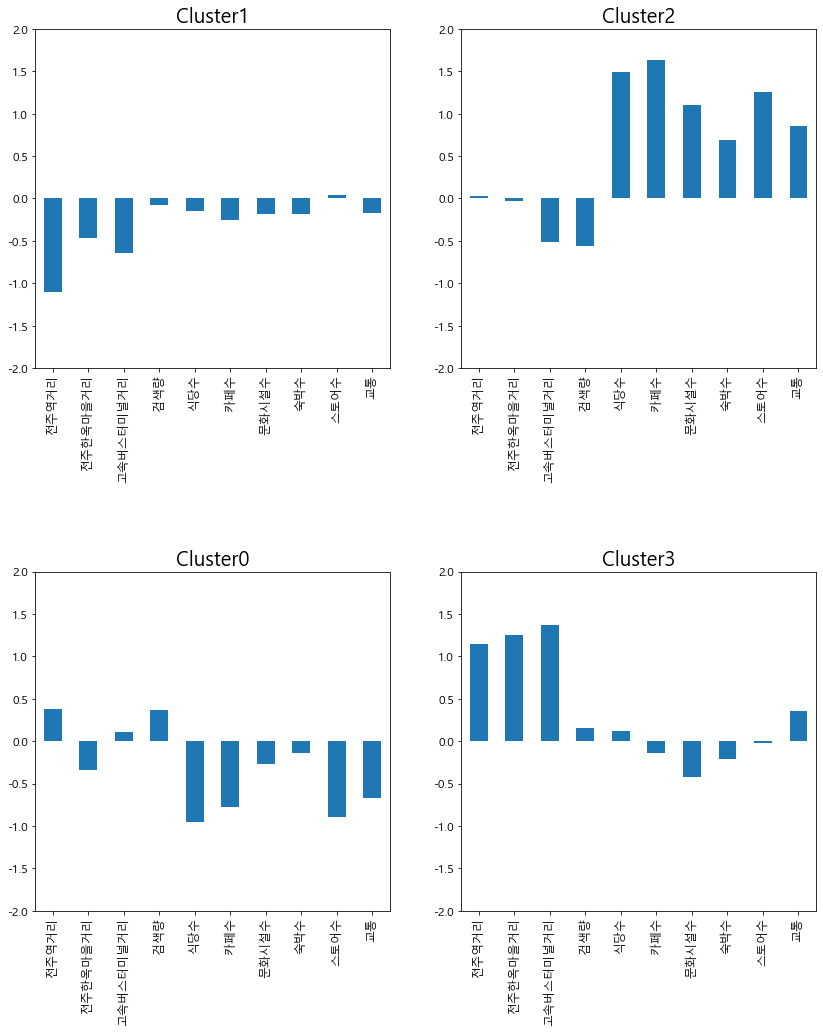

In [411]:
i = 0
plt.figure()
fig,ax = plt.subplots(2,2,figsize = (14,14))
for num in scaler_df2['kmedoids'].unique() :   
    i+=1
    plt.subplot(2,2,i)
    plt.title("Cluster{}".format(num),fontsize = 20)
    scaler_df2.loc[scaler_df2['kmedoids'] == num].iloc[:,:-2].mean().plot.bar()
    locs,labels = plt.xticks()
    plt.ylim([-2,2])
    plt.subplots_adjust(hspace =.6, top = 1)
    plt.tick_params(axis = 'both',which = 'major',labelsize = 12)
plt.show()

In [425]:
finals['cluster'] = scaler_df2['kmedoids'].tolist()

In [440]:
cluster2 = finals.loc[(finals['cluster']==2) & (finals['cluster'].index !='풍남동')]

In [454]:
cluster2.iloc[:,:3].rank().sum(axis = 1) + cluster2.iloc[:,3:-1].rank(ascending = False).sum(axis = 1)

행정동
덕진동     50.0
서신동     52.0
송천1동    63.5
중앙동     39.5
효자4동    59.0
효자5동    51.0
dtype: float64